In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [3]:
# The data
from sklearn.datasets import load_iris
data = load_iris()

data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# features
df_feat = pd.DataFrame(data['data'])
df_feat.rename(columns={0:'sepal_length_cm',
                   1:'sepal_width_cm',
                   2:'petal_length_cm',
                   3:'petal_width_cm'}, inplace=True)
df_feat

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df_targ = pd.DataFrame(data['target'])
df_targ.rename(columns={0:'species'}, inplace=True)
df_targ['specie_name'] = df_targ.replace(to_replace={0:'setosa',
                                                     1:'versicolor',
                                                     2:'virginica'})

df_targ

,species,specie_name
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa
...,...,...
145,2,virginica
146,2,virginica
147,2,virginica
148,2,virginica


In [6]:
# Merge the feature and target dataframes 

df = pd.merge(df_feat, df_targ, left_index=True, right_index=True)
df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species,specie_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## Exploratory Data Analysis (EDA)

The dataset has 150 training examples, 6 features and no null values

The Target has 3 unique classes Setosa Versicolor and Virginica each has 50 training examples

In [7]:
df.specie_name.value_counts()

setosa        50
versicolor    50
virginica     50
Name: specie_name, dtype: int64

In [8]:
df.columns


Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'species', 'specie_name'],
      dtype='object')

In [9]:
df_corr = df[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'species']].corr()
df_corr

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
sepal_length_cm,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width_cm,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length_cm,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width_cm,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

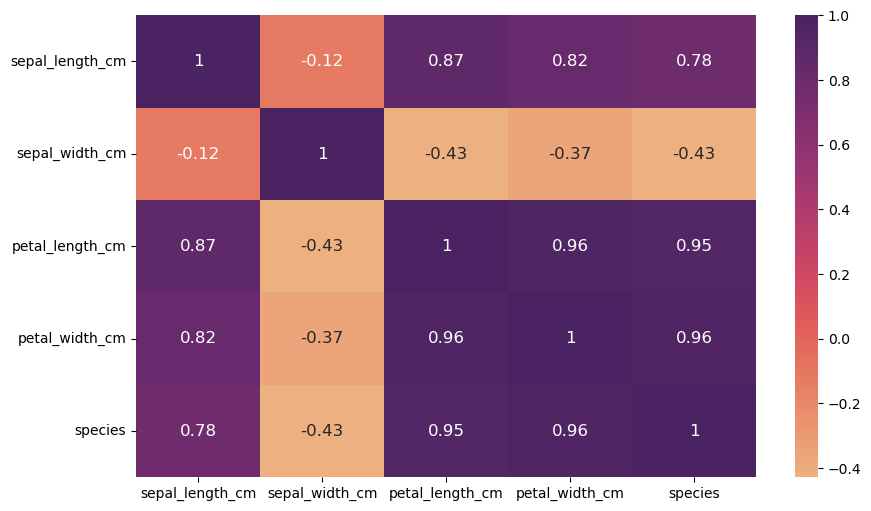

In [10]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(data=df_corr, annot=True, annot_kws={'size':12}, cmap='flare')

### UNIVARIATE DATA ANALYSIS

Text(0, 0.5, '')

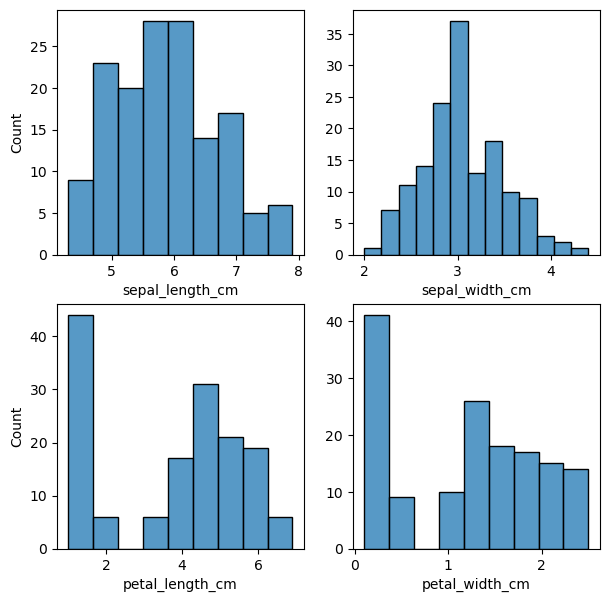

In [11]:
plt.figure(figsize=(7,7))


plt.subplot(2,2,1)
sns.histplot(df['sepal_length_cm'])

plt.subplot(2,2,2)
sns.histplot(df['sepal_width_cm'])
plt.ylabel(None)

plt.subplot(2,2,3)
sns.histplot(df['petal_length_cm'])

plt.subplot(2,2,4)
sns.histplot(df['petal_width_cm'])
plt.ylabel(None)

### MULTI-VARIABLE DATA ANALYSIS

<Figure size 1200x700 with 0 Axes>

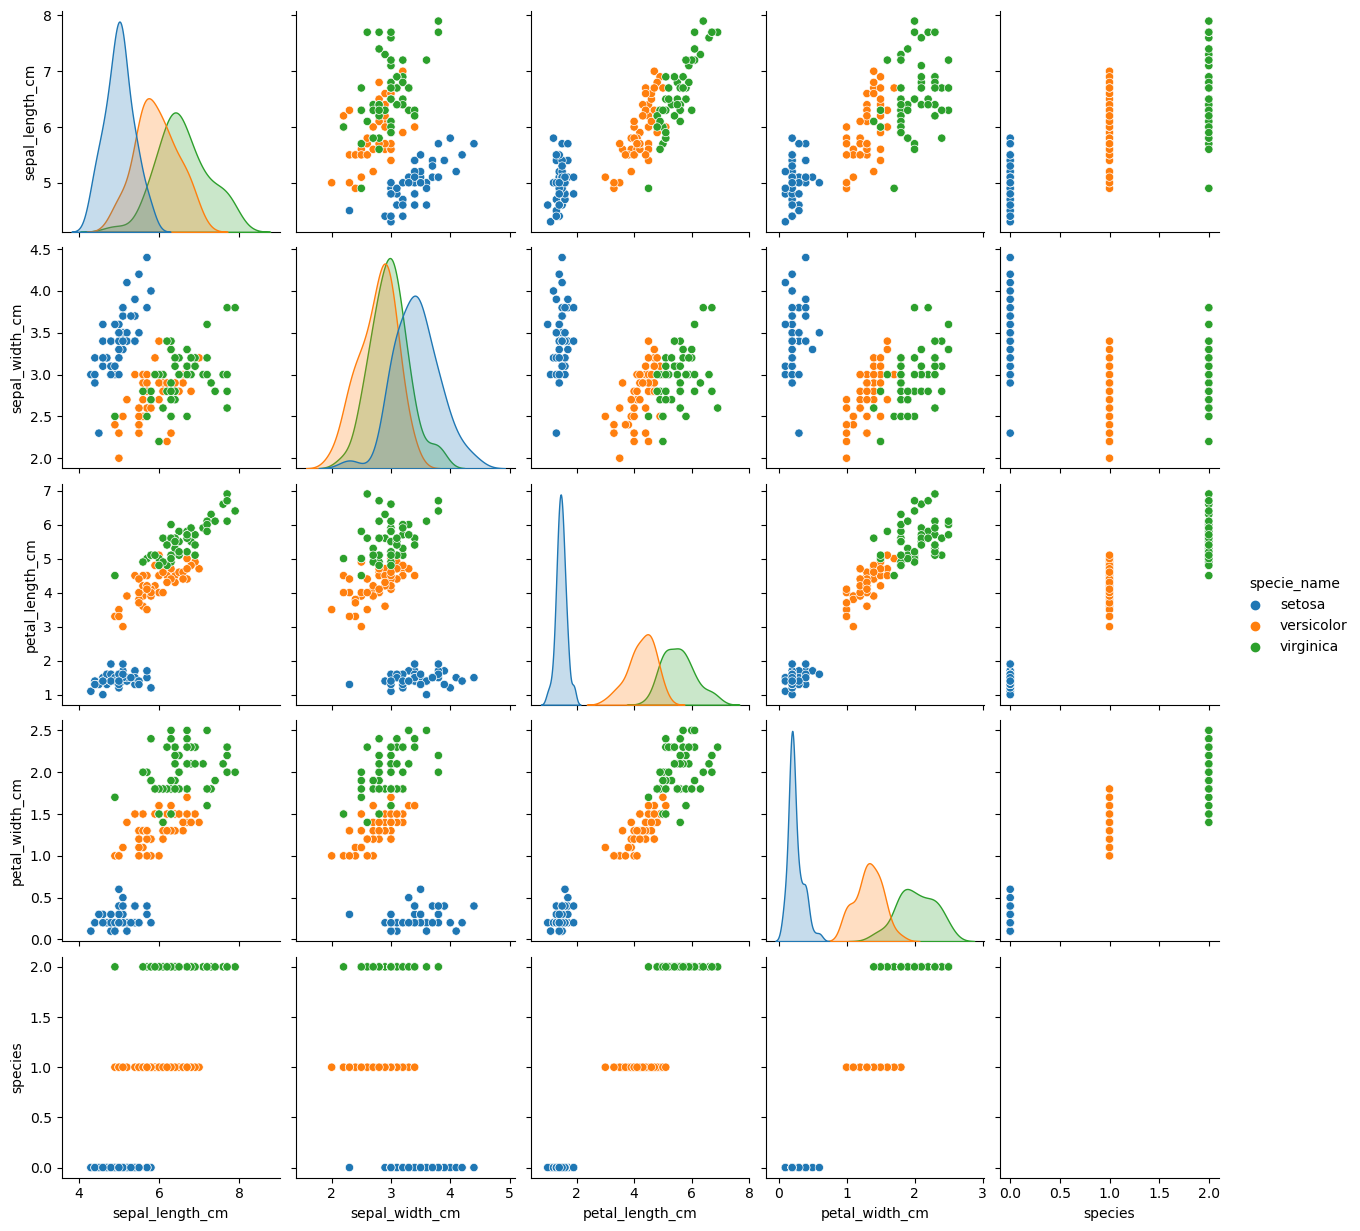

In [12]:
df_columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'species']

plt.figure(figsize=(12,7))
sns.pairplot(data=df, vars=df_columns, hue='specie_name')


In [13]:
df.query("specie_name == 'setosa'").sort_values(by='sepal_width_cm', ascending=True)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species,specie_name
41,4.5,2.3,1.3,0.3,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
13,4.3,3.0,1.1,0.1,0,setosa
12,4.8,3.0,1.4,0.1,0,setosa
25,5.0,3.0,1.6,0.2,0,setosa
38,4.4,3.0,1.3,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
45,4.8,3.0,1.4,0.3,0,setosa
34,4.9,3.1,1.5,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [14]:
df.query("sepal_width_cm == 2.3")

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species,specie_name
41,4.5,2.3,1.3,0.3,0,setosa
53,5.5,2.3,4.0,1.3,1,versicolor
87,6.3,2.3,4.4,1.3,1,versicolor
93,5.0,2.3,3.3,1.0,1,versicolor


In [15]:
df.drop(index=41, inplace=True)

In [16]:
df.reset_index(drop=True)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species,specie_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2,virginica
145,6.3,2.5,5.0,1.9,2,virginica
146,6.5,3.0,5.2,2.0,2,virginica
147,6.2,3.4,5.4,2.3,2,virginica


<Figure size 1200x700 with 0 Axes>

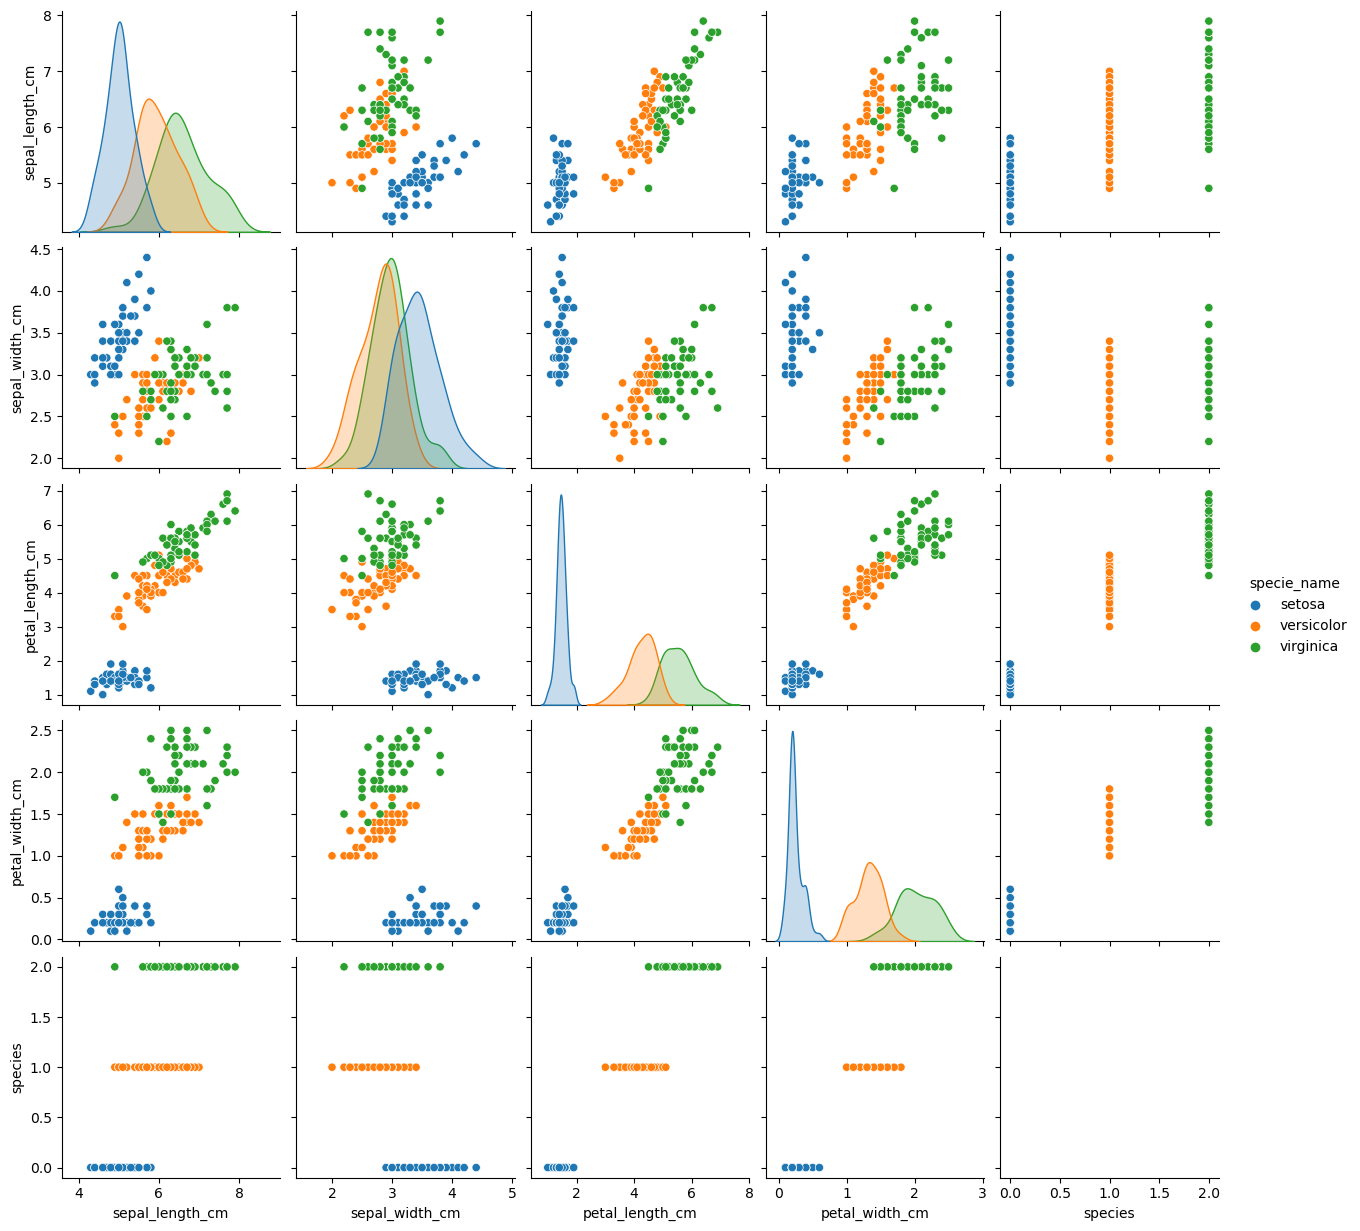

In [17]:
df_columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'species']

plt.figure(figsize=(12,7))
sns.pairplot(data=df, vars=df_columns, hue='specie_name')


### Data Scaling

In [18]:
# Z-score normalization
from sklearn.preprocessing import StandardScaler

In [19]:
df.columns


Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'species', 'specie_name'],
      dtype='object')

In [20]:
y = df['species']
y = y.values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
z_scaler = StandardScaler()

df = z_scaler.fit_transform(df[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm']])



In [22]:
df

array([[-0.9167484 ,  1.01433919, -1.35399398, -1.32521752],
       [-1.16045136, -0.14468335, -1.35399398, -1.32521752],
       [-1.40415432,  0.31892567, -1.41101634, -1.32521752],
       [-1.52600581,  0.08712116, -1.29697162, -1.32521752],
       [-1.03859988,  1.2461437 , -1.35399398, -1.32521752],
       [-0.55119395,  1.94155722, -1.18292691, -1.06158947],
       [-1.52600581,  0.78253468, -1.35399398, -1.1934035 ],
       [-1.03859988,  0.78253468, -1.29697162, -1.32521752],
       [-1.76970877, -0.37648786, -1.35399398, -1.32521752],
       [-1.16045136,  0.08712116, -1.29697162, -1.45703155],
       [-0.55119395,  1.47794821, -1.29697162, -1.32521752],
       [-1.28230284,  0.78253468, -1.23994926, -1.32521752],
       [-1.28230284, -0.14468335, -1.35399398, -1.45703155],
       [-1.89156025, -0.14468335, -1.52506105, -1.45703155],
       [-0.06378802,  2.17336173, -1.4680387 , -1.32521752],
       [-0.18563951,  3.10057977, -1.29697162, -1.06158947],
       [-0.55119395,  1.

In [29]:
X = pd.DataFrame(df)
X

,0,1,2,3
0,-0.916748,1.014339,-1.353994,-1.325218
1,-1.160451,-0.144683,-1.353994,-1.325218
2,-1.404154,0.318926,-1.411016,-1.325218
3,-1.526006,0.087121,-1.296972,-1.325218
4,-1.038600,1.246144,-1.353994,-1.325218
...,...,...,...,...
144,1.032875,-0.144683,0.812856,1.442877
145,0.545469,-1.303706,0.698811,0.915621
146,0.789172,-0.144683,0.812856,1.047435
147,0.423618,0.782535,0.926900,1.442877


### The Data

In [30]:
print(f"X = {X.shape} \n y = {y.shape}")

X = (149, 4) 
 y = (149,)


### Model Training

In [31]:
from sklearn.model_selection import train_test_split
"""
train_set=0.60
test_set=0.20
dev_set=0.20
"""

X_temp, X_test, y_temp, y_test = train_test_split(X,y, stratify=y, test_size=0.20)

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=(0.2/0.8))

In [33]:
print(f"Training set(train): {X_train.shape}")
print(f"Training set(test): {y_train.shape}")
print(f"Dev set(train): {X_val.shape}")
print(f"Dev set(test): {y_val.shape}")
print(f"Test set(train): {X_test.shape}")
print(f"Test set(test): {y_test.shape}")

Training set(train): (89, 4)
Training set(test): (89,)
Dev set(train): (30, 4)
Dev set(test): (30,)
Test set(train): (30, 4)
Test set(test): (30,)


In [34]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()


In [35]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = lr_model.predict(X_train)
y_pred

array([1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 2, 0,
       1, 2, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2, 2, 0, 0, 1, 2, 1, 2,
       0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       0, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 0,
       0])

In [37]:
y_train

array([1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 2, 0,
       1, 2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2, 1, 2,
       0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       0, 2, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 0,
       0])

In [38]:
lr_model.score(X_train, y_train)

0.9662921348314607

In [39]:
lr_model.coef_

array([[-0.97545232,  1.00134297, -1.60804531, -1.4936864 ],
       [ 0.36429737, -0.4526785 , -0.22879471, -0.6585841 ],
       [ 0.61115495, -0.54866447,  1.83684002,  2.1522705 ]])

In [40]:
lr_model.intercept_

array([-0.18021072,  1.71790175, -1.53769103])

In [41]:
lr_model.predict(X_val)

array([1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 2, 1, 2, 2, 0])

In [42]:
y_val

array([1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 0, 0, 0,
       1, 0, 1, 2, 1, 2, 2, 0])

In [43]:
lr_model.score(X_val,y_val)

0.9333333333333333

|TRAIN NO    | CHANGE | SCORE |
|------------|--------|-------|
|first       |init    | 97.75%|

## Save Model

In [24]:
import pickle


In [45]:
pickle_out = open("model.pkl", "wb")
pickle.dump(lr_model, pickle_out)
pickle_out.close()

## Save Scaler

In [25]:
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(z_scaler, scaler_file)